19


<IPython.core.display.Javascript object>


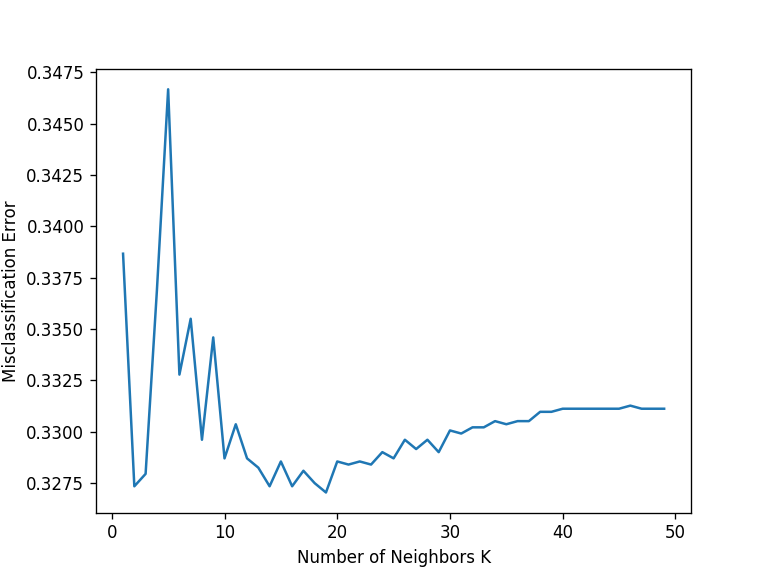

0.6746223564954683


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

from actual_work.preprocessing import Preprocessing
from actual_work.classifier import Classifier

prep = Preprocessing("offenseval-training-v1.tsv")
"""
[1] SVMClassifier
[2] RandomForest_Classifier
[3] LogisticalRegression_Classifier
[4] NaiveBayesClassifier
[5] KNNClassifier
[6] DTClassifier
"""
clf = Classifier(prep.train_tweets, prep.train_labels, prep.test_tweets, prep.test_labels,5)